# Bank Data analysis

In [1]:
#libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('C:/Users/Carla/Desktop/Projects/Bank Savings/UK-Bank-Customers.csv')
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [3]:
df.shape

(4014, 9)

### Distibution of the data by attributes

In [4]:
#Numerical representaion of Gender
df.groupby('Gender').size()

Gender
Female    1849
Male      2165
dtype: int64

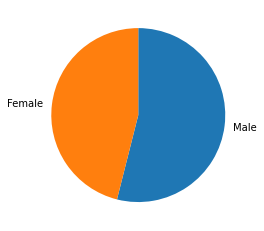

In [5]:
#Graphical representation of gender
gendercount = df['Gender'].value_counts()
 
plt.pie(gendercount, labels = gendercount.index, startangle = 90, counterclock = False);

In [11]:
#Numerical representaion of Job
df.groupby('Job Classification').size()

Job Classification
Blue Collar     1049
Other           1010
White Collar    1955
dtype: int64

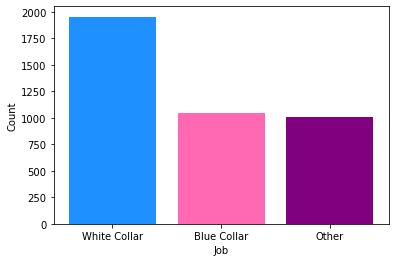

In [25]:
#Graphical representation
x = df['Job Classification'].unique()
y = df['Job Classification'].value_counts()
plt.bar(x, y, color=['dodgerblue','hotpink','purple'])
 
# Labeling the axes
plt.xlabel('Job')
plt.ylabel('Count')
 
# Dsiplay the plot
plt.show()


In [12]:
#Numerical representaion of Job by gender
df.groupby(['Job Classification','Gender']).size()

Job Classification  Gender
Blue Collar         Female     255
                    Male       794
Other               Female     584
                    Male       426
White Collar        Female    1010
                    Male       945
dtype: int64

<AxesSubplot:xlabel='Job Classification', ylabel='count'>

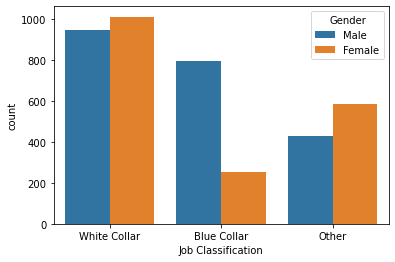

In [33]:
#Graphical representation
sn.countplot(data = df, x = 'Job Classification', hue = 'Gender')

In [13]:
#Numerical representaion of Region
df.groupby('Region').size()

Region
England             2159
Northern Ireland     211
Scotland            1124
Wales                520
dtype: int64

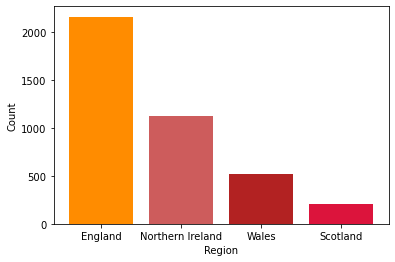

In [28]:
#Graphical representation
x = df['Region'].unique()
y = df['Region'].value_counts()
plt.bar(x, y, color=['darkorange','indianred','firebrick','crimson'])
 
# Labeling the axes
plt.xlabel('Region')
plt.ylabel('Count')
 
# Dsiplay the plot
plt.show()


In [14]:
df.groupby(['Region','Job Classification']).size()

Region            Job Classification
England           Blue Collar            344
                  Other                  314
                  White Collar          1501
Northern Ireland  Blue Collar             41
                  Other                  105
                  White Collar            65
Scotland          Blue Collar            544
                  Other                  496
                  White Collar            84
Wales             Blue Collar            120
                  Other                   95
                  White Collar           305
dtype: int64

### Balances Analysis

In [10]:
#Average of age and savings balance
dfa = df[['Gender','Age','Balance']]
dfg = dfa.groupby('Gender').mean().round(0)
dfg.head()

,Age,Balance
Gender,,
Female,37.0,39472.0
Male,40.0,40018.0


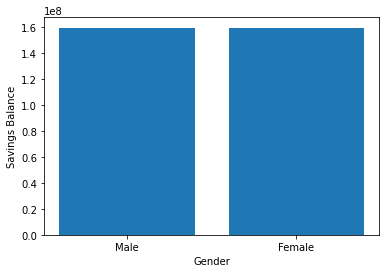

In [34]:
#Graphical representation of gender and savings
x = df['Gender'].unique()
y = df['Balance'].sum()
plt.bar(x, y)
 
# Labeling the axes
plt.xlabel('Gender')
plt.ylabel('Savings Balance')
 
# Dsiplay the plot
plt.show()

In [53]:
#Creation of Subset for analysis
newdf = df[['Region','Job Classification','Gender','Balance']]
newdf.head()

,Region,Job Classification,Gender,Balance
0,England,White Collar,Male,113810.15
1,Northern Ireland,Blue Collar,Female,36919.73
2,England,White Collar,Male,101536.83
3,Wales,White Collar,Male,1421.52
4,England,Blue Collar,Female,35639.79


In [54]:
balancegroup = newdf.groupby(['Region','Job Classification','Gender']).sum()
balancegroup

Balance
Region           Job Classification Gender             
England          Blue Collar        Female   6158491.62
                                    Male     7108845.88
                 Other              Female   7124827.06
                                    Male     5667617.57
                 White Collar       Female  30344657.96
                                    Male    28428956.91
Northern Ireland Blue Collar        Female   1135005.49
                                    Male      450550.30
                 Other              Female   3649086.74
                                    Male      423413.15
                 White Collar       Female   1302707.27
                                    Male     1374803.44
Scotland         Blue Collar        Female    995047.34
                                    Male    20378147.46
                 Other              Female   9984065.44
                                    Male     9658610.04
                 White Collar       Female    921634.90
                                    Male     2473225.54
Wales            Blue Collar        Female   1359992.96
                                    Male     3747974.45
                 Other              Female   2187981.94
                                    Male     1526982.89
                 White Collar       Female   7820035.35
                                    Male     5399861.67

In [18]:
#Total Value of savings per region
baldf = df[['Region','Balance']]
baldf = baldf.groupby('Region').sum()
baldf

,Balance
Region,
England,84833397.00
Northern Ireland,8335566.39
Scotland,44410730.72
Wales,22042829.26


<AxesSubplot:xlabel='Region'>

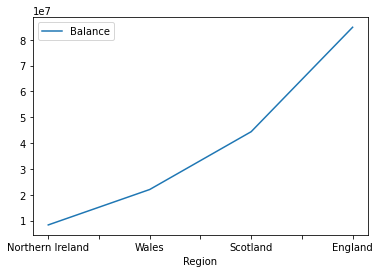

In [23]:
#Graphical representation of Total Value of savings per region
baldf = baldf.sort_values('Balance')
baldf.plot()

In [24]:
#Average of savings per region
baldfavg = df[['Region','Balance']]
baldfavg = baldfavg.groupby('Region').mean()
baldfavg

,Balance
Region,
England,39292.911996
Northern Ireland,39505.053981
Scotland,39511.326263
Wales,42390.056269


<AxesSubplot:xlabel='Region'>

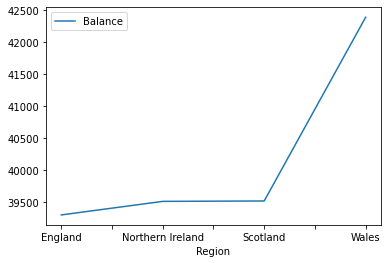

In [25]:
#Graphical representation of Avg of savings per region
baldfavg = baldfavg.sort_values('Balance')
baldfavg.plot()

In [27]:
#Total Value of savings per region
jobdf = df[['Job Classification','Balance']]
jobdf = jobdf.groupby('Job Classification').sum()
jobdf

,Balance
Job Classification,
Blue Collar,41334055.50
Other,40222584.83
White Collar,78065883.04


<AxesSubplot:xlabel='Job Classification'>

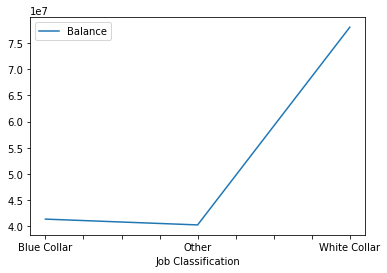

In [30]:
#Graphical representation
jobdf.reset_index().plot(x='Job Classification', y='Balance')